In [ ]:
# 2 командная задача НТИ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
!pip install catboost
from catboost import CatBoostRegressor

     |████████████████████████████████| 65.8MB 51kB/s 


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/nti_datasets/train.csv')
X_train['Дата'] = pd.to_datetime(X_train['Дата'])
X_train.set_index('Дата', inplace=True)

В csv-шки уже добавлена колонка "Выходной"

In [ ]:
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май','Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

X_train['Время'] = X_train['Время'].apply(lambda x: int(x[:2]) % 24)
X_train['Номер месяца'] = [months.index(i) for i in X_train['Месяц']]
X_train['День'] = X_train['День'].apply(lambda x: int(x[4:]))
X_train['День недели'] = [i.weekday() for i in X_train.index]
X_train['Номер месяца'] = X_train['Номер месяца'] + (X_train['Год'] - 2018) * 12 - 10
X_train['Секунда'] = [(i.timestamp() / 3600 - 428069.0) / 17000 for i in X_train.index]

Я больной, поэтому превращаю мультирегрессию с 4 выводами в мультирегрессию с 20 :)

In [ ]:
value_cols = ['Все 18+_TVR', 'Все 55+_TVR','Все 18+_Share', 'Все 55+_Share']
channels = X_train['Канал'].unique().tolist()
new_X_train = X_train[X_train['Канал'] == 'ПЕРВЫЙ КАНАЛ']
new_value_cols = []
for c in channels:
    for val in value_cols:
        new_value_cols += [c + val]
        new_X_train[c + val] = X_train[val][X_train['Канал'] == c]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[]

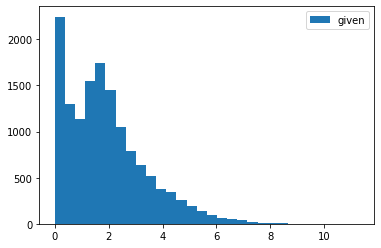

In [ ]:
arr = np.array(target)[:,0]
plt.hist(arr, label='given', bins=30)
plt.legend()
plt.plot()

[]

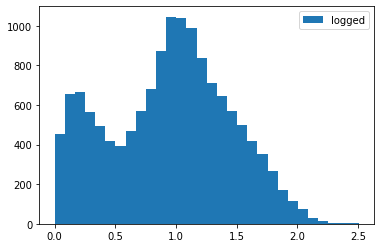

In [ ]:

logd = np.log(arr + 1)
plt.hist(logd, label='logged', bins=30)
plt.legend()
plt.plot()

[]

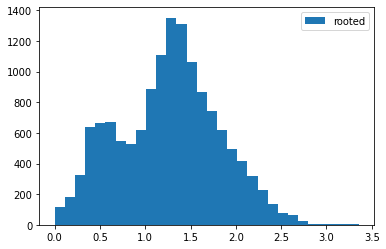

In [ ]:

root = arr ** .5
plt.hist(root, label='rooted', bins=30)
plt.legend()
plt.plot()

In [ ]:
target = new_X_train[new_value_cols]
train_cols = ['Время', 'День недели', 'Выходной',
              'Номер месяца', 'Год', 'Секунда']
train = new_X_train[train_cols]

In [ ]:
max_target = np.array([2.5087859235779435,
 2.9861868607104594,
 3.959097412814075,
 4.066116540765546,
 2.5447466501440172,
 2.952302715626655,
 3.7256934272366524,
 3.981362483506759,
 1.8946168546677629,
 1.7334238922150915,
 3.5773890780805733,
 3.4732079176384274,
 1.5912739418064292,
 2.0373166153791646,
 3.500137329517059,
 3.7191661467188086,
 1.6544112780768316,
 1.6845453849209058,
 3.393837027255863,
 3.4701013603093664])
target = np.log(target + 1) / max_target

In [ ]:
target.describe().loc['max'].tolist()

[2.5087859235779435,
 2.9861868607104594,
 3.959097412814075,
 4.066116540765546,
 2.5447466501440172,
 2.952302715626655,
 3.7256934272366524,
 3.981362483506759,
 1.8946168546677629,
 1.7334238922150915,
 3.5773890780805733,
 3.4732079176384274,
 1.5912739418064292,
 2.0373166153791646,
 3.500137329517059,
 3.7191661467188086,
 1.6544112780768316,
 1.6845453849209058,
 3.393837027255863,
 3.4701013603093664]

In [ ]:
params = {'cat_features': ['Выходной'],
          'loss_function': 'MultiRMSE',
          'iterations': 1000,
          'grow_policy': 'Depthwise',
          'depth':7,
          'random_state': 0
          }
          
model = CatBoostRegressor(**params)
model.fit(train, target, verbose=10)
pickle.dump(model, open("model.pkl", "wb"))

0:	learn: 14.9712491	total: 18.1ms	remaining: 18.1s
10:	learn: 14.5991060	total: 188ms	remaining: 16.9s
20:	learn: 14.3350443	total: 371ms	remaining: 17.3s
30:	learn: 13.9229882	total: 616ms	remaining: 19.2s
40:	learn: 13.5466862	total: 859ms	remaining: 20.1s
50:	learn: 13.2175545	total: 1.13s	remaining: 21s
60:	learn: 12.9765394	total: 1.41s	remaining: 21.6s
70:	learn: 12.7137062	total: 1.75s	remaining: 22.9s
80:	learn: 12.5059610	total: 2.08s	remaining: 23.6s
90:	learn: 12.3581269	total: 2.4s	remaining: 23.9s
100:	learn: 12.2188890	total: 2.73s	remaining: 24.3s
110:	learn: 12.0864983	total: 3.1s	remaining: 24.8s
120:	learn: 11.9682420	total: 3.47s	remaining: 25.2s
130:	learn: 11.8644547	total: 3.86s	remaining: 25.6s
140:	learn: 11.7759137	total: 4.25s	remaining: 25.9s
150:	learn: 11.7045303	total: 4.65s	remaining: 26.1s
160:	learn: 11.6396541	total: 5.03s	remaining: 26.2s
170:	learn: 11.5856265	total: 5.42s	remaining: 26.3s
180:	learn: 11.5349993	total: 5.8s	remaining: 26.3s
190:	lea

In [ ]:
model.get_feature_importance()

array([76.99418767,  5.51443982,  3.06277229,  3.93555788,  0.88233488,
        9.61070746])

In [ ]:
# MSLE по train
import sklearn
from sklearn import metrics
metrics.mean_squared_log_error
y_true = target
y_pred = model.predict(train)
y_pred[y_pred < 0] = 0
metrics.mean_squared_log_error(y_true, y_pred)

0.007440385044565137

In [ ]:
# Актуальный submission.py
import numpy as np
import sys
import pandas as pd
from catboost import CatBoostRegressor
import sklearn
import datetime
import pickle
np.set_printoptions(threshold=sys.maxsize)


def eval(data):
    months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май','Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    
    X_test = pd.read_csv("test.csv")
    X_test['Дата'] = pd.to_datetime(X_test['Дата'])
    X_test.set_index('Дата', inplace=True)
    X_ans = X_test.copy()
    
    X_test['Время'] = X_test['Время'].apply(lambda x: int(x[:2]) % 24)
    X_test['День'] = X_test['День'].apply(lambda x: int(x[4:]))
    X_test['Номер месяца'] = [months.index(i) for i in X_test['Месяц']]
    X_test['День недели'] = [i.weekday() for i in X_test.index]
    X_test['Номер месяца'] = X_test['Номер месяца'] + (X_test['Год'] - 2018) * 12 - 10
    X_test['Секунда'] = [(i.timestamp() / 3600 - 428069.0) / 17000 for i in X_test.index]
    
    train_cols = ['Время', 'День недели', 'Выходной',
                  'Номер месяца', 'Год', 'Секунда']
    value_cols = ['Все 18+_TVR', 'Все 55+_TVR',
                  'Все 18+_Share', 'Все 55+_Share']
    channels = X_test['Канал'].unique().tolist()
    
    new_value_cols = []
    for c in channels:
        for val in value_cols:
            new_value_cols += [c + val]
    max_target = np.array([3.3600595232822883,
                             4.337049688440288,
                             7.170076708097341,
                             7.571657678474377,
                             3.4263683398023628,
                             4.260281680828158,
                             6.363961030678928,
                             7.251896303726357,
                             2.3769728648009427,
                             2.1587033144922905,
                             5.897457079114693,
                             5.589275444992848,
                             1.977371993328519,
                             2.582634314028992,
                             5.6674509261219015,
                             6.342712353559792,
                             2.0566963801203135,
                             2.0952326839756963,
                             5.364699432400664,
                             5.580322571321482])
    
    model = pickle.load(open("model.pkl","rb"))

    pred = model.predict(X_test[train_cols])
    pred[pred < 0] = 0
    pred = (pred * max_target) ** 2
    pred = pd.DataFrame(data=pred, columns=new_value_cols)
    np.round(pred, decimals=2)
    
    X_ans = X_ans.reset_index().sort_values(by=["Дата","Канал"])
    for c in channels:
        for val in value_cols:
            X_ans.loc[X_ans['Канал'] == c, val] = pred[c + val]
    
    str_x_res = X_ans.to_csv()
    return str_x_res
eval(None)